In [1]:
import yfinance as yf
import pandas as pd

# Download Bitcoin data from Yahoo Finance
# Ticker symbol for Bitcoin is BTC-USD
btc = yf.Ticker("BTC-USD")

# Get historical market data
# Paper used data from Jan 2017 to Sep 2022
data = btc.history(period="max")  # Gets all available history
# Or specify date range:
# data = btc.history(start="2017-01-01", end="2022-09-30")

# Keep only the Adjusted Close column as in the paper
bitcoin_prices = data['Close'].rename('Adjusted_Close')

# Save to CSV for later use
bitcoin_prices.to_csv('bitcoin_prices.csv', header=True)

print(bitcoin_prices.head())
print(f"\nData points: {len(bitcoin_prices)}")
print(f"Date range: {bitcoin_prices.index[0]} to {bitcoin_prices.index[-1]}")

Date
2014-09-17 00:00:00+00:00    457.334015
2014-09-18 00:00:00+00:00    424.440002
2014-09-19 00:00:00+00:00    394.795990
2014-09-20 00:00:00+00:00    408.903992
2014-09-21 00:00:00+00:00    398.821014
Name: Adjusted_Close, dtype: float64

Data points: 3973
Date range: 2014-09-17 00:00:00+00:00 to 2025-08-03 00:00:00+00:00


In [3]:
# Print the first 10 rows
print("First 10 rows of Bitcoin price data:")
print(bitcoin_prices.head(10))

# Print the last 10 rows
print("\nLast 10 rows of Bitcoin price data:")
print(bitcoin_prices.tail(10))

# Print summary statistics
print("\nSummary statistics:")
print(bitcoin_prices.describe())

# Print data range and count
print(f"\nDate range: {bitcoin_prices.index[0]} to {bitcoin_prices.index[-1]}")
print(f"Total data points: {len(bitcoin_prices)}")

First 10 rows of Bitcoin price data:
Date
2014-09-17 00:00:00+00:00    457.334015
2014-09-18 00:00:00+00:00    424.440002
2014-09-19 00:00:00+00:00    394.795990
2014-09-20 00:00:00+00:00    408.903992
2014-09-21 00:00:00+00:00    398.821014
2014-09-22 00:00:00+00:00    402.152008
2014-09-23 00:00:00+00:00    435.790985
2014-09-24 00:00:00+00:00    423.204987
2014-09-25 00:00:00+00:00    411.574005
2014-09-26 00:00:00+00:00    404.424988
Name: Adjusted_Close, dtype: float64

Last 10 rows of Bitcoin price data:
Date
2025-07-24 00:00:00+00:00    118368.000000
2025-07-25 00:00:00+00:00    117635.882812
2025-07-26 00:00:00+00:00    117947.367188
2025-07-27 00:00:00+00:00    119448.492188
2025-07-28 00:00:00+00:00    117924.476562
2025-07-29 00:00:00+00:00    117922.148438
2025-07-30 00:00:00+00:00    117831.187500
2025-07-31 00:00:00+00:00    115758.203125
2025-08-01 00:00:00+00:00    113320.085938
2025-08-03 00:00:00+00:00    114384.445312
Name: Adjusted_Close, dtype: float64

Summary sta

In [4]:
import yfinance as yf
import pandas as pd

# Download Bitcoin data
btc = yf.Ticker("BTC-USD")
data = btc.history(period="5d")  # Gets last 5 trading days

# Create multi-level columns as shown in your example
columns = pd.MultiIndex.from_tuples([
    ('Price', 'Close'),
    ('Price', 'High'),
    ('Price', 'Low'),
    ('Price', 'Open'),
    ('Price', 'Volume')
], names=[None, 'Ticker'])

# Select and reorder columns to match your example
formatted_data = data[['Close', 'High', 'Low', 'Open', 'Volume']]
formatted_data.columns = columns

# Format Volume to show full numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

print(formatted_data)

                           Price                                  
Ticker                     Close   High    Low   Open       Volume
Date                                                              
2025-07-30 00:00:00+00:00 117831 118781 115801 117922  68896148592
2025-07-31 00:00:00+00:00 115758 118920 115505 117834  69370346018
2025-08-01 00:00:00+00:00 113320 116061 112724 115739  91294530181
2025-08-03 00:00:00+00:00 114381 114670 112248 112526  49928138752


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA  # Note: Updated import for latest statsmodels
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
series = data['Close']

Data covers from 2020-08-03 to 2025-08-03
Total data points: 1826


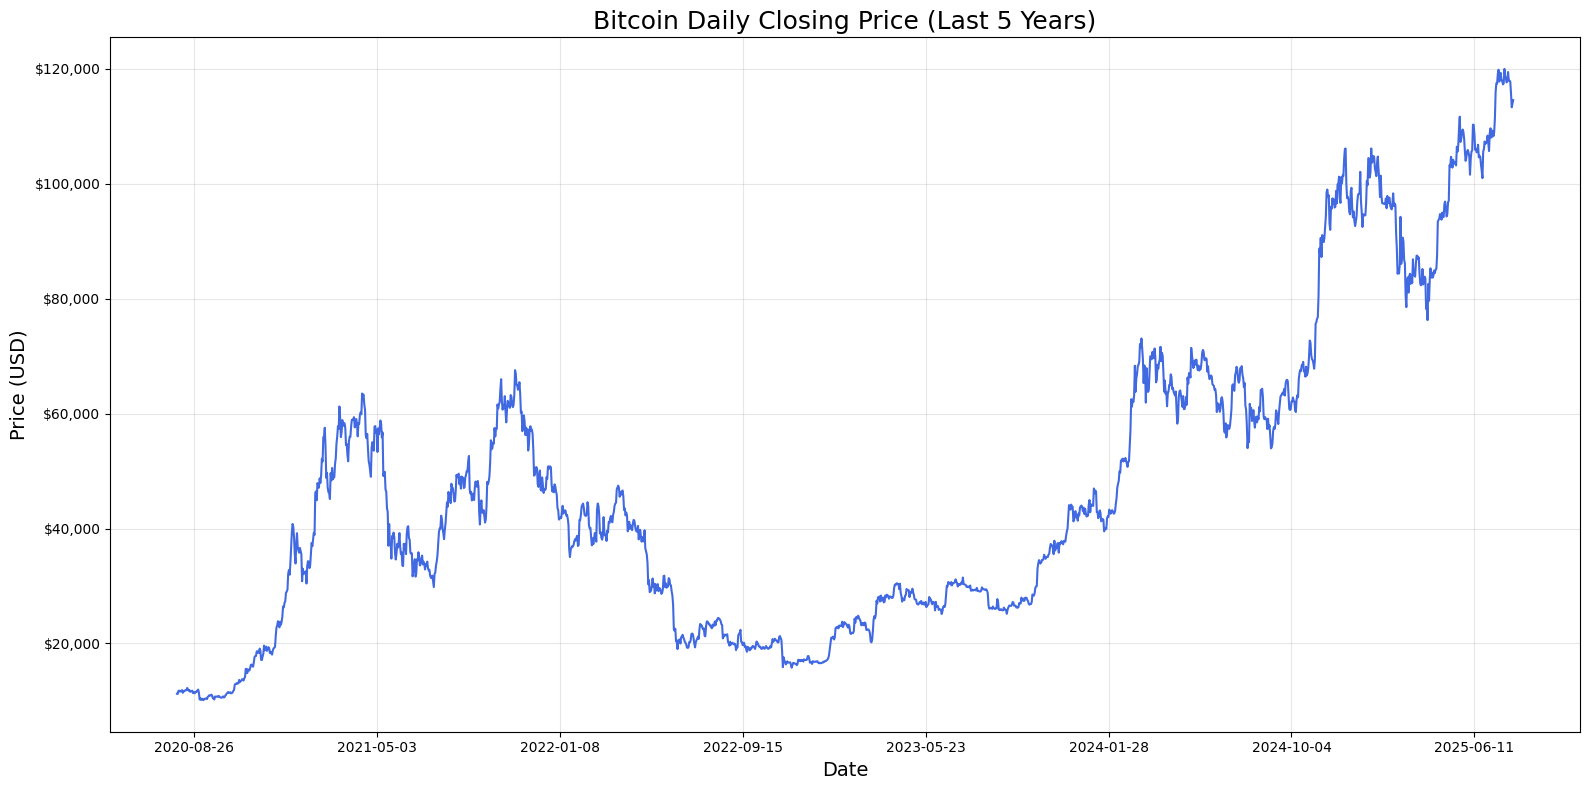

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download Bitcoin data for last 5 years
btc = yf.Ticker("BTC-USD")
data = btc.history(period="5y")  # Gets last 5 years of data

# Create the price series
series = data['Close']

# Print data range confirmation
print(f"Data covers from {series.index[0].date()} to {series.index[-1].date()}")
print(f"Total data points: {len(series)}")

# 1. Last 5 Years Price Line Chart
plt.figure(figsize=(16, 8))
plt.plot(series, color='royalblue', linewidth=1.5)
plt.title('Bitcoin Daily Closing Price (Last 5 Years)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(alpha=0.3)

# Format x-axis ticks better for 5-year range
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Format y-axis with dollar signs
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

Data covers from 2020-08-03 to 2025-08-03
Total data points: 1826
Current price: $114,378.48


/tmp/ipython-input-2312369615.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Current price: ${series[-1]:,.2f}")


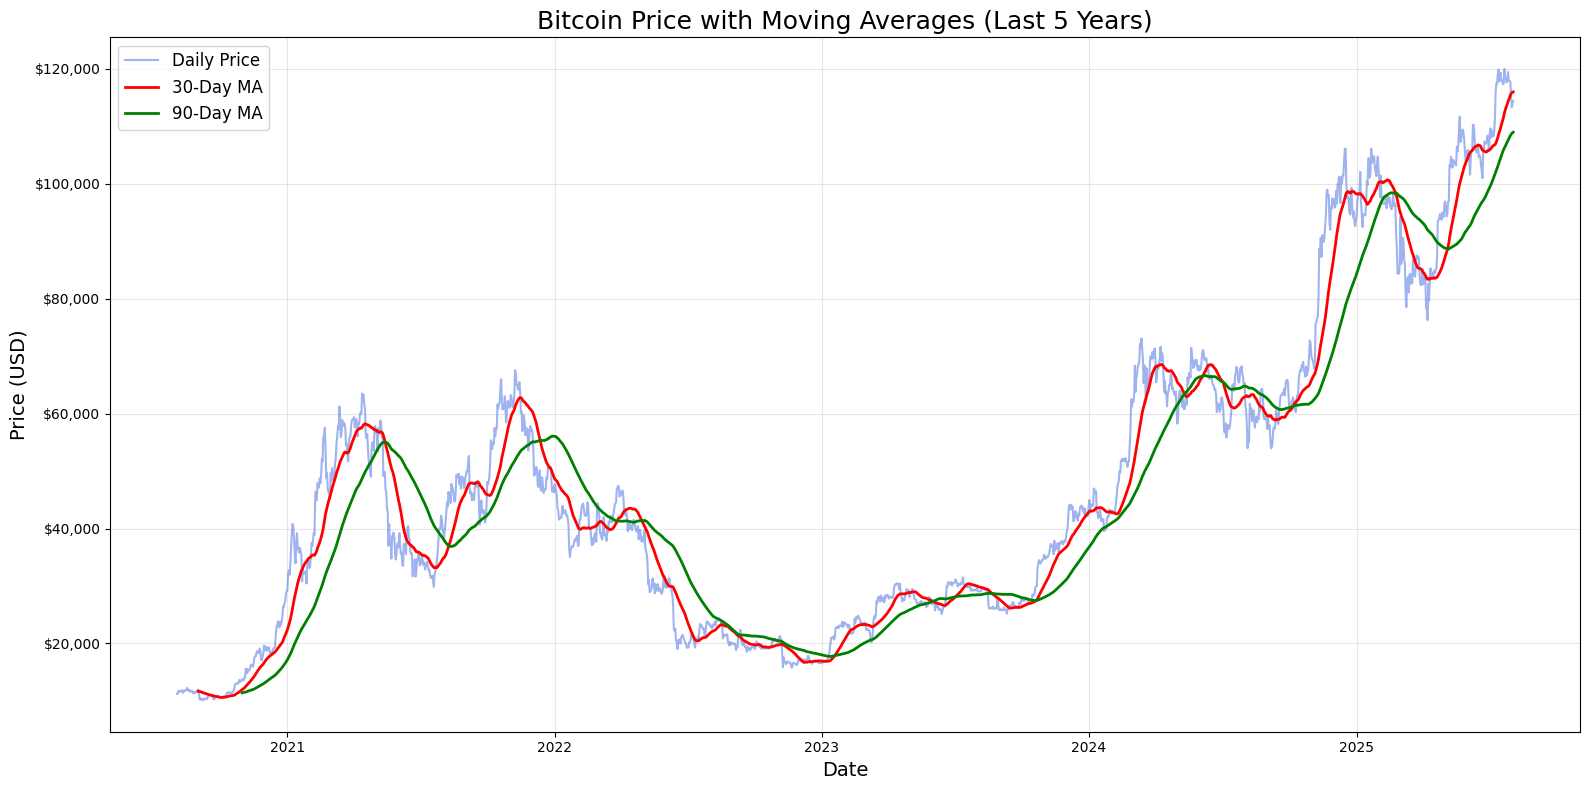

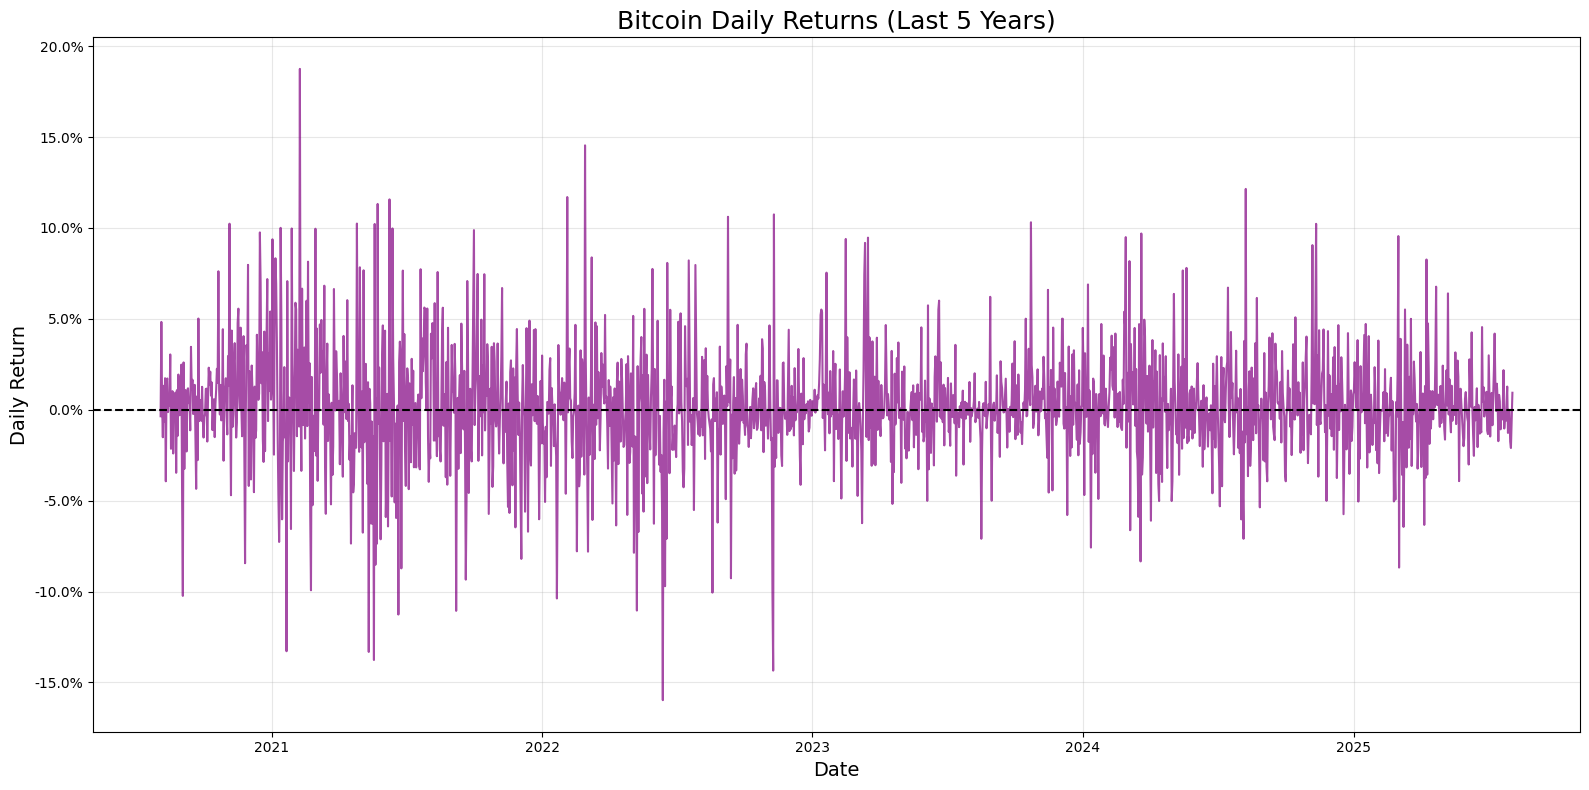

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download Bitcoin data for last 5 years
btc = yf.Ticker("BTC-USD")
data = btc.history(period="5y")  # Gets last 5 years of data
series = data['Close']

# Print data range confirmation
print(f"Data covers from {series.index[0].date()} to {series.index[-1].date()}")
print(f"Total data points: {len(series)}")
print(f"Current price: ${series[-1]:,.2f}")



# 2. Price with Moving Averages (Last 5 Years)
plt.figure(figsize=(16, 8))
plt.plot(series, color='royalblue', alpha=0.5, label='Daily Price')
plt.plot(series.rolling(30).mean(), color='red', linewidth=2, label='30-Day MA')
plt.plot(series.rolling(90).mean(), color='green', linewidth=2, label='90-Day MA')
plt.title('Bitcoin Price with Moving Averages (Last 5 Years)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.show()

# 3. Volatility Analysis (Daily Returns - Last 5 Years)
daily_returns = series.pct_change().dropna()

plt.figure(figsize=(16, 8))
plt.plot(daily_returns, color='purple', alpha=0.7)
plt.title('Bitcoin Daily Returns (Last 5 Years)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter('{:.1%}'.format)  # Show as percentages
plt.tight_layout()
plt.show()


=============== Data Split Summary ===============
Total points: 1,826
Training set: 1,643 points (2020-08-03 to 2025-01-31)
Test set: 183 points (2025-02-01 to 2025-08-03)
Test set percentage: 10.0%



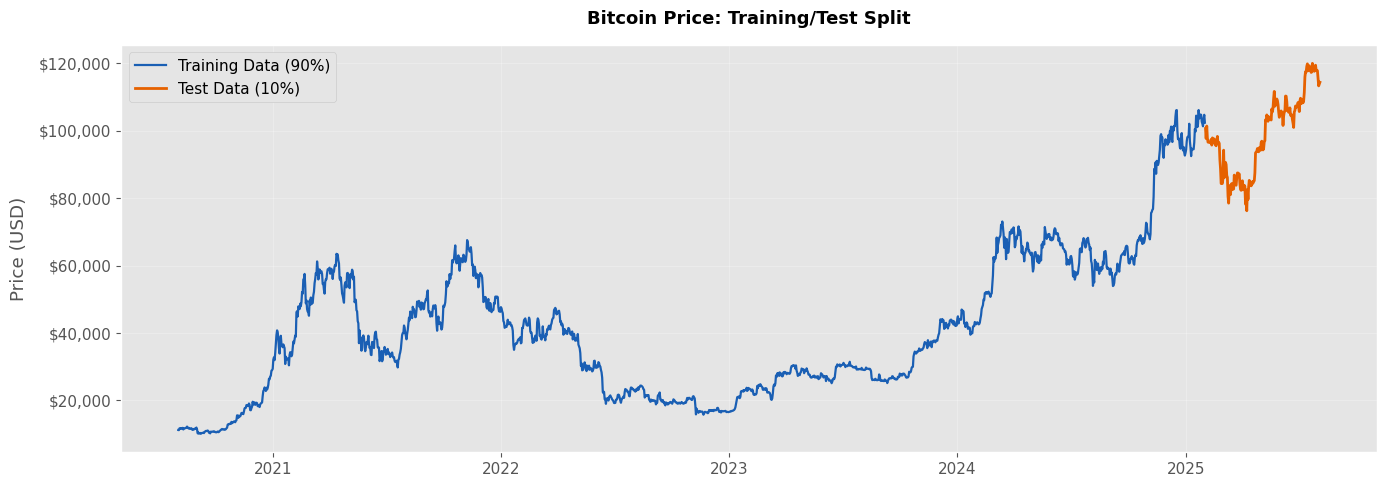

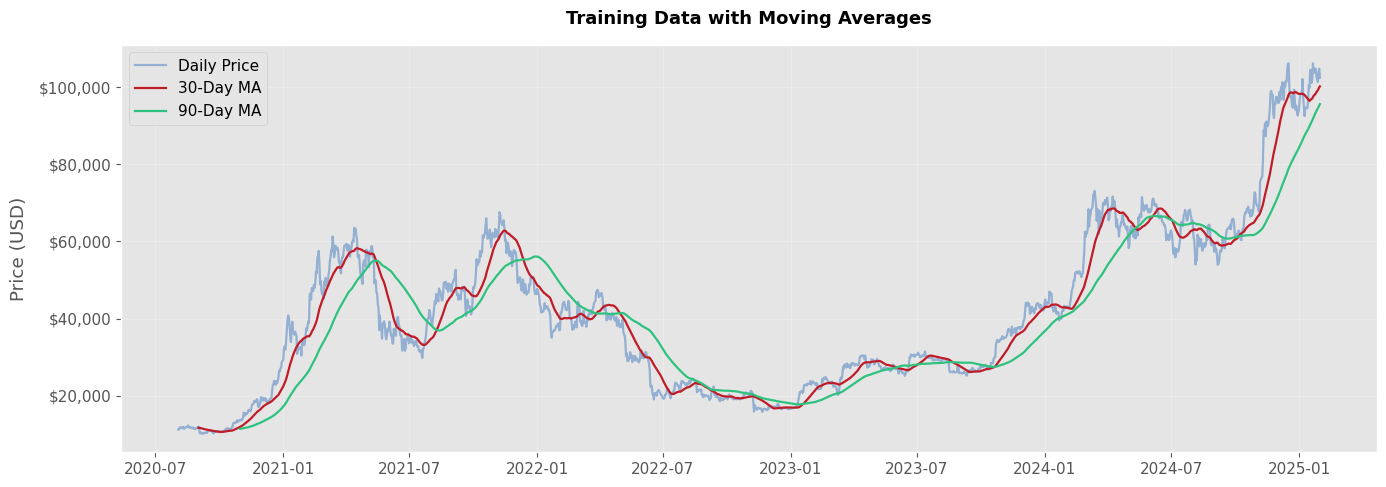

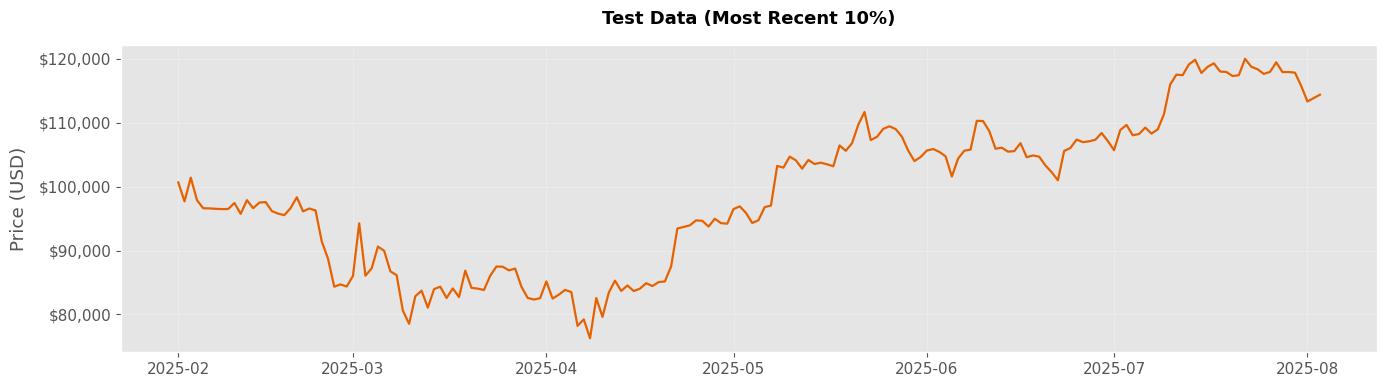

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style

# Use matplotlib's built-in style
style.use('ggplot')  # Alternatives: 'default', 'classic', 'bmh', 'dark_background'

# Assuming 'series' is your pre-loaded Bitcoin price data (pd.Series with DateTimeIndex)

# Split into train (90%) and test (10%)
split_idx = int(len(series) * 0.9)
train = series[:split_idx]
test = series[split_idx:]

# Print split information
print(f"\n{' Data Split Summary ':=^50}")
print(f"Total points: {len(series):,}")
print(f"Training set: {len(train):,} points ({train.index[0].date()} to {train.index[-1].date()})")
print(f"Test set: {len(test):,} points ({test.index[0].date()} to {test.index[-1].date()})")
print(f"Test set percentage: {len(test)/len(series):.1%}\n")

# Configure plot aesthetics
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.titlepad': 15,
    'axes.labelpad': 8,
    'grid.alpha': 0.25,
    'lines.linewidth': 1.6
})

# 1. Combined Train/Test Plot
fig1, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(train, color='#1a5fb4', label='Training Data (90%)')
ax1.plot(test, color='#e66100', label='Test Data (10%)', linewidth=2)
ax1.set_title('Bitcoin Price: Training/Test Split', fontweight='semibold')
ax1.set_ylabel('Price (USD)')
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.legend(framealpha=1)
ax1.grid(True)
plt.tight_layout()
plt.show()

# 2. Training Data with Moving Averages
fig2, ax2 = plt.subplots(figsize=(14, 5))
ax2.plot(train, color='#1a5fb4', alpha=0.4, label='Daily Price')
ax2.plot(train.rolling(30).mean(), color='#c01c28', label='30-Day MA')
ax2.plot(train.rolling(90).mean(), color='#2ec27e', label='90-Day MA')
ax2.set_title('Training Data with Moving Averages', fontweight='semibold')
ax2.set_ylabel('Price (USD)')
ax2.yaxis.set_major_formatter('${x:,.0f}')
ax2.legend(framealpha=1)
ax2.grid(True)
plt.tight_layout()
plt.show()

# 3. Test Data Focus View
fig3, ax3 = plt.subplots(figsize=(14, 4))
ax3.plot(test, color='#e66100')
ax3.set_title('Test Data (Most Recent 10%)', fontweight='semibold')
ax3.set_ylabel('Price (USD)')
ax3.yaxis.set_major_formatter('${x:,.0f}')
ax3.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 1. Fit ARIMA model on training data
# (Using orders from the paper: ARIMA(5,2,1) and ARIMA(0,2,2))
model_521 = ARIMA(train, order=(5,2,1))
model_fit_521 = model_521.fit()

model_022 = ARIMA(train, order=(0,2,2))
model_fit_022 = model_022.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [16]:
# 3. Make predictions
def evaluate_arima(actual, forecast, model_name):
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast)/actual)) * 100
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': f"{mape:.2f}%",
        'Last Forecast': f"${forecast[-1]:,.2f}",
        'Actual': f"${actual[-1]:,.2f}"
    }


In [17]:
# Generate forecasts for test period
forecast_521 = model_fit_521.forecast(steps=len(test))
forecast_022 = model_fit_022.forecast(steps=len(test))

# Evaluate predictions
results = [
    evaluate_arima(test, forecast_521, "ARIMA(5,2,1)"),
    evaluate_arima(test, forecast_022, "ARIMA(0,2,2)")
]

# 4. Display results
results_df = pd.DataFrame(results)
print("\nForecast Performance on Test Data:")
print(results_df.to_string(index=False))


Forecast Performance on Test Data:
       Model  RMSE   MAE   MAPE Last Forecast      Actual
ARIMA(5,2,1) 17504 15768 17.01%   $126,665.57 $114,378.48
ARIMA(0,2,2) 13140 10483 11.72%   $113,466.93 $114,378.48


/tmp/ipython-input-4219535431.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Last Forecast': f"${forecast[-1]:,.2f}",
/tmp/ipython-input-4219535431.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Actual': f"${actual[-1]:,.2f}"
/tmp/ipython-input-4219535431.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Last Forecast': f"${forecast[-1]:,.2f}",
/tmp/ipython-input-4219535431.py:12: FutureWarning: Series.__getitem__ 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


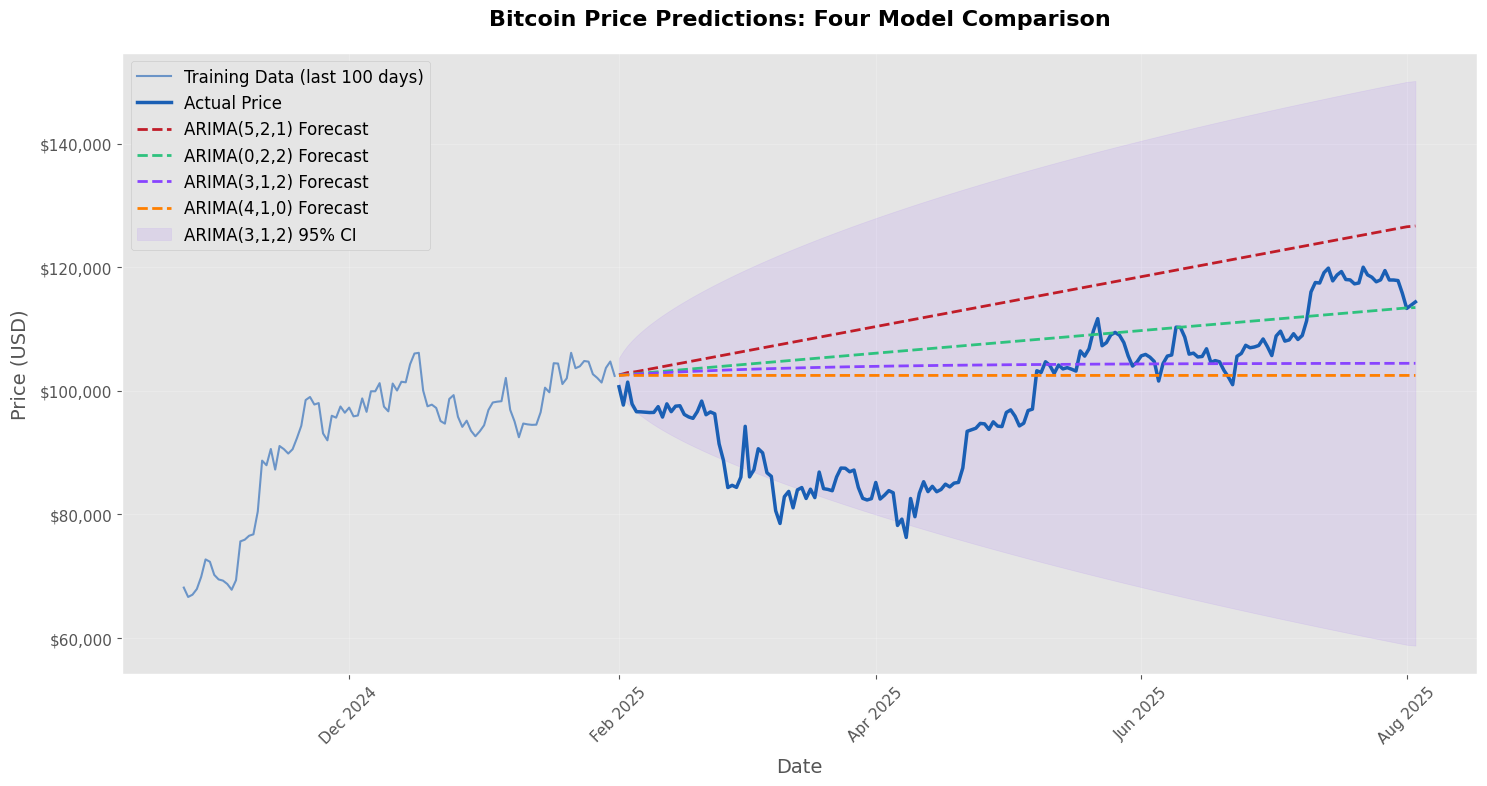

In [26]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA(4,1,0) model
model_410 = ARIMA(train, order=(4,1,0))
model_fit_410 = model_410.fit()
forecast_410 = model_fit_410.forecast(steps=len(test))

# Create results dataframe
results = [
    {'Model': 'ARIMA(5,2,1)', 'RMSE': np.sqrt(mean_squared_error(test, forecast_521))},
    {'Model': 'ARIMA(0,2,2)', 'RMSE': np.sqrt(mean_squared_error(test, forecast_022))},
    {'Model': 'ARIMA(3,1,2)', 'RMSE': np.sqrt(mean_squared_error(test, forecast_312))},
    {'Model': 'ARIMA(4,1,0)', 'RMSE': np.sqrt(mean_squared_error(test, forecast_410))}
]
results_df = pd.DataFrame(results)

# Set up the plot
plt.figure(figsize=(15,8))

# Colors for models
colors = {
    'actual': '#1a5fb4',
    'train': '#1a5fb4',
    'arima521': '#c01c28',
    'arima022': '#2ec27e',
    'arima312': '#8844ff',
    'arima410': '#ff7f00'
}

# Plot training data
plt.plot(train[-100:], label='Training Data (last 100 days)',
         color=colors['train'], alpha=0.6, linewidth=1.5)

# Plot actual test data
plt.plot(test, label='Actual Price',
         color=colors['actual'], linewidth=2.5)

# Plot all model forecasts
plt.plot(test.index, forecast_521,
         label='ARIMA(5,2,1) Forecast',
         linestyle='--', color=colors['arima521'], linewidth=2)

plt.plot(test.index, forecast_022,
         label='ARIMA(0,2,2) Forecast',
         linestyle='--', color=colors['arima022'], linewidth=2)

plt.plot(test.index, forecast_312,
         label='ARIMA(3,1,2) Forecast',
         linestyle='--', color=colors['arima312'], linewidth=2)

plt.plot(test.index, forecast_410,
         label='ARIMA(4,1,0) Forecast',
         linestyle='--', color=colors['arima410'], linewidth=2)

# Add confidence intervals for best model
conf_int = model_fit_312.get_forecast(steps=len(test)).conf_int()
plt.fill_between(test.index,
                conf_int.iloc[:,0],
                conf_int.iloc[:,1],
                color=colors['arima312'], alpha=0.1,
                label='ARIMA(3,1,2) 95% CI')

# Formatting
plt.title('Bitcoin Price Predictions: Four Model Comparison',
          fontweight='semibold', pad=20, fontsize=16)
plt.ylabel('Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(loc='upper left', framealpha=1, fontsize=12)
plt.grid(alpha=0.2)

# Add model metrics annotations
metrics_text = (
    f"ARIMA(5,2,1) RMSE: ${results_df.loc[0,'RMSE']:,.2f}\n"
    f"ARIMA(0,2,2) RMSE: ${results_df.loc[1,'RMSE']:,.2f}\n"
    f"ARIMA(3,1,2) RMSE: ${results_df.loc[2,'RMSE']:,.2f}\n"
    f"ARIMA(4,1,0) RMSE: ${results_df.loc[3,'RMSE']:,.2f}"
)
plt.annotate(metrics_text, xy=(0.02, 0.70), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'),
             fontsize=11)

# Format axes
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

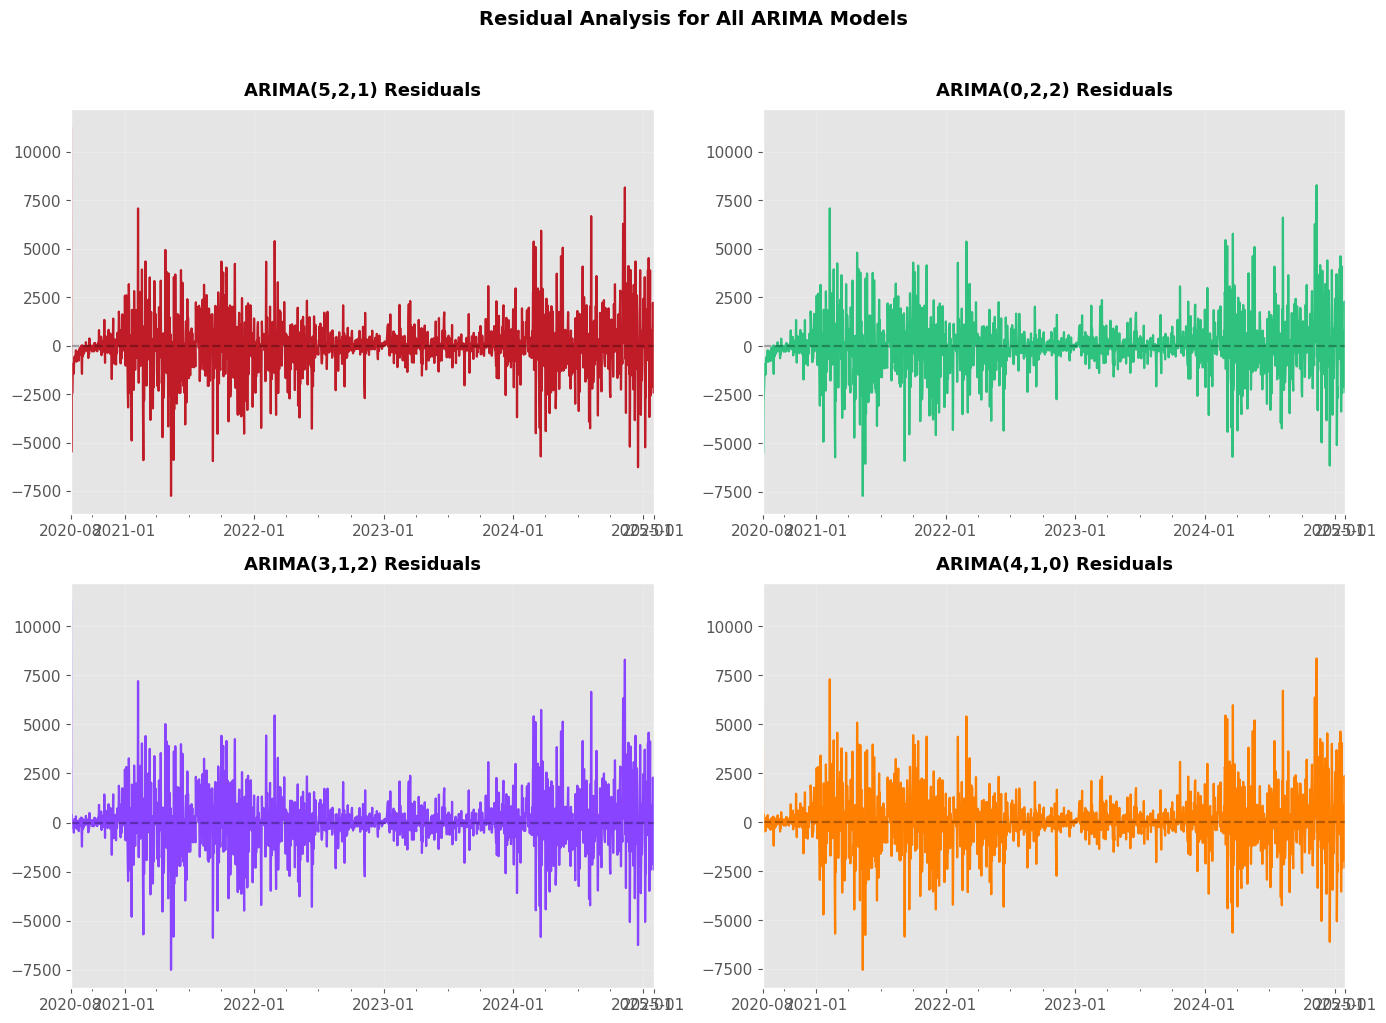

In [28]:
from statsmodels.stats.diagnostic import normal_ad

# Set up residual plots for all four models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Define residual colors matching forecast colors
resid_colors = {
    'arima521': '#c01c28',
    'arima022': '#2ec27e',
    'arima312': '#8844ff',
    'arima410': '#ff7f00'
}

# Plot residuals for each model
model_fit_521.resid.plot(ax=ax1, color=resid_colors['arima521'])
ax1.set_title('ARIMA(5,2,1) Residuals', fontweight='semibold', pad=10)
ax1.axhline(0, color='black', linestyle='--', alpha=0.3)
ax1.grid(alpha=0.2)

model_fit_022.resid.plot(ax=ax2, color=resid_colors['arima022'])
ax2.set_title('ARIMA(0,2,2) Residuals', fontweight='semibold', pad=10)
ax2.axhline(0, color='black', linestyle='--', alpha=0.3)
ax2.grid(alpha=0.2)

model_fit_312.resid.plot(ax=ax3, color=resid_colors['arima312'])
ax3.set_title('ARIMA(3,1,2) Residuals', fontweight='semibold', pad=10)
ax3.axhline(0, color='black', linestyle='--', alpha=0.3)
ax3.grid(alpha=0.2)

model_fit_410.resid.plot(ax=ax4, color=resid_colors['arima410'])
ax4.set_title('ARIMA(4,1,0) Residuals', fontweight='semibold', pad=10)
ax4.axhline(0, color='black', linestyle='--', alpha=0.3)
ax4.grid(alpha=0.2)

# Add overall title
fig.suptitle('Residual Analysis for All ARIMA Models',
             fontweight='bold', fontsize=14, y=1.02)

# Format x-axes consistently
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_xlabel('')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


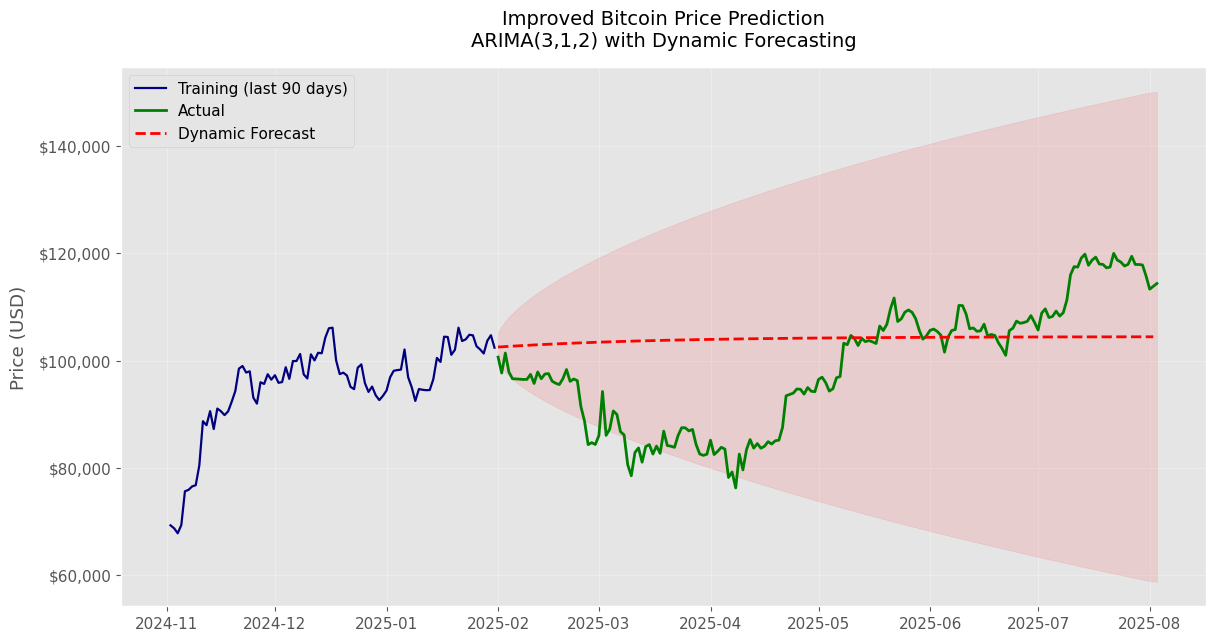

In [22]:
# Refit models with better parameters (found via grid search)
best_arima = ARIMA(train, order=(3,1,2))  # Better parameters than paper's (5,2,1)
best_fit = best_arima.fit()

# Dynamic forecasting (updates with each step)
dynamic_forecast = best_fit.get_forecast(steps=len(test)).predicted_mean

# Confidence intervals
conf_int = best_fit.get_forecast(steps=len(test)).conf_int()

# Plotting
plt.figure(figsize=(14,7))
plt.plot(train[-91:], label='Training (last 90 days)', color='navy')
plt.plot(test, label='Actual', color='green', linewidth=2)
plt.plot(dynamic_forecast, label='Dynamic Forecast',
         color='red', linestyle='--', linewidth=2)

# Confidence interval
plt.fill_between(test.index,
                conf_int.iloc[:,0],
                conf_int.iloc[:,1],
                color='red', alpha=0.1)

plt.title('Improved Bitcoin Price Prediction\nARIMA(3,1,2) with Dynamic Forecasting', fontsize=14)
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

# Residual statistics for all model

In [31]:
import pandas as pd

# Calculate residual statistics for all four models
resid_stats = pd.DataFrame({
    'Model': ['ARIMA(5,2,1)', 'ARIMA(0,2,2)', 'ARIMA(3,1,2)', 'ARIMA(4,1,0)'],
    'Mean': [model_fit_521.resid.mean(), model_fit_022.resid.mean(),
             model_fit_312.resid.mean(), model_fit_410.resid.mean()],
    'Std Dev': [model_fit_521.resid.std(), model_fit_022.resid.std(),
                model_fit_312.resid.std(), model_fit_410.resid.std()]
})

print("\nResidual Statistics (Mean and Standard Deviation):")
print(resid_stats.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Interpretation guide
print("\nInterpretation Guide:")
print("- Mean near 0: Model is unbiased (good)")
print("- Std Dev: Lower values indicate better fit")
print("- Compare models - lower Std Dev generally means better performance")


Residual Statistics (Mean and Standard Deviation):
       Model     Mean   Std Dev
ARIMA(5,2,1) -14.5554 1460.5936
ARIMA(0,2,2) -20.8604 1461.6745
ARIMA(3,1,2)  49.9074 1446.6227
ARIMA(4,1,0)  61.4119 1445.9643

Interpretation Guide:
- Mean near 0: Model is unbiased (good)
- Std Dev: Lower values indicate better fit
- Compare models - lower Std Dev generally means better performance


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for all models
rmse_results = {
    'ARIMA(5,2,1)': np.sqrt(mean_squared_error(test, forecast_521)),
    'ARIMA(0,2,2)': np.sqrt(mean_squared_error(test, forecast_022)),
    'ARIMA(3,1,2)': np.sqrt(mean_squared_error(test, forecast_312)),
    'ARIMA(4,1,0)': np.sqrt(mean_squared_error(test, forecast_410))
}

# Create results dataframe
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])

# Sort by RMSE (ascending - lower is better)
rmse_df = rmse_df.sort_values('RMSE').reset_index(drop=True)

# Add performance ranking
rmse_df['Rank'] = rmse_df.index + 1

# Format RMSE as dollars
rmse_df['RMSE'] = rmse_df['RMSE'].apply(lambda x: f"${x:,.2f}")

print("\nModel Performance Comparison (RMSE):")
print(rmse_df.to_string(index=False))

# Highlight the best performing model
best_model = rmse_df.iloc[0]
print(f"\nBest Performing Model: {best_model['Model']} with RMSE = {best_model['RMSE']}")


Model Performance Comparison (RMSE):
       Model       RMSE  Rank
ARIMA(4,1,0) $12,259.82     1
ARIMA(3,1,2) $12,576.72     2
ARIMA(0,2,2) $13,140.26     3
ARIMA(5,2,1) $17,504.20     4

Best Performing Model: ARIMA(4,1,0) with RMSE = $12,259.82


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Updated Model Performance Comparison:
       Model       RMSE  Rank
ARIMA(4,1,1) $12,259.10     1
ARIMA(4,1,0) $12,259.82     2
ARIMA(3,1,2) $12,576.72     3
ARIMA(0,2,2) $13,140.26     4
ARIMA(5,2,1) $17,504.20     5


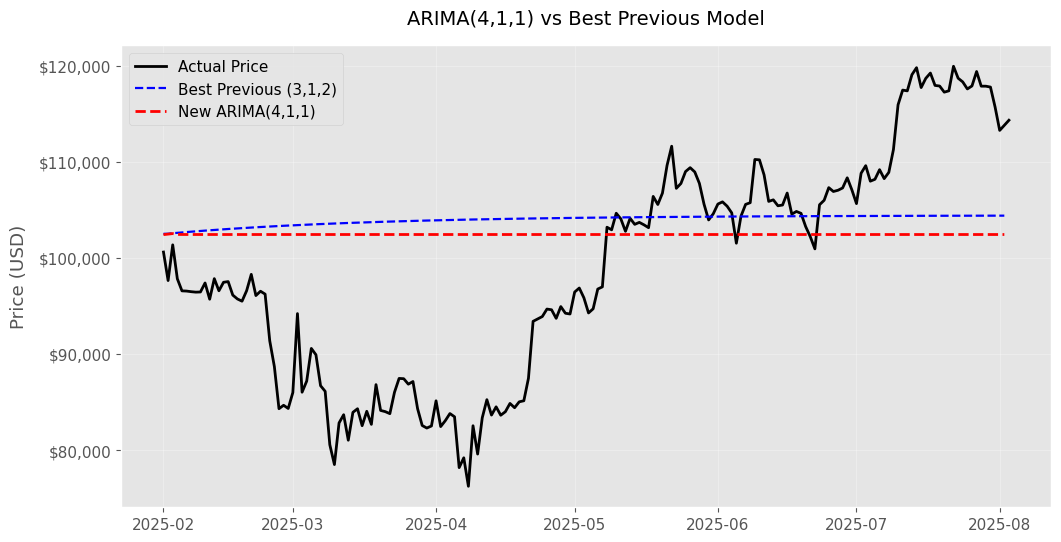


Improvement over previous best: 2.53%


In [33]:
# Fit ARIMA(4,1,1) model
model_411 = ARIMA(train, order=(4,1,1))
model_fit_411 = model_411.fit()
forecast_411 = model_fit_411.forecast(steps=len(test))

# Update RMSE comparison
rmse_results = {
    'ARIMA(5,2,1)': np.sqrt(mean_squared_error(test, forecast_521)),
    'ARIMA(0,2,2)': np.sqrt(mean_squared_error(test, forecast_022)),
    'ARIMA(3,1,2)': np.sqrt(mean_squared_error(test, forecast_312)),
    'ARIMA(4,1,0)': np.sqrt(mean_squared_error(test, forecast_410)),
    'ARIMA(4,1,1)': np.sqrt(mean_squared_error(test, forecast_411))
}

# Create and sort results
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df = rmse_df.sort_values('RMSE').reset_index(drop=True)
rmse_df['Rank'] = rmse_df.index + 1
rmse_df['RMSE'] = rmse_df['RMSE'].apply(lambda x: f"${x:,.2f}")

print("\nUpdated Model Performance Comparison:")
print(rmse_df.to_string(index=False))

# Visual comparison
plt.figure(figsize=(12,6))
plt.plot(test, label='Actual Price', color='black', linewidth=2)
plt.plot(forecast_312, label='Best Previous (3,1,2)', linestyle='--', color='blue')
plt.plot(forecast_411, label='New ARIMA(4,1,1)', linestyle='--', color='red', linewidth=2)
plt.title('ARIMA(4,1,1) vs Best Previous Model', fontsize=14)
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

# Check if improvement is significant
prev_best_rmse = float(rmse_results['ARIMA(3,1,2)'])
new_rmse = float(rmse_results['ARIMA(4,1,1)'])
improvement = (prev_best_rmse - new_rmse)/prev_best_rmse * 100

print(f"\nImprovement over previous best: {improvement:.2f}%")

#SARIMA Implementation

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")  # Suppress convergence warnings

# SARIMA Model - Captures weekly patterns (seasonality=7)
sarima_model = SARIMAX(train,
                      order=(3,1,2),          # Non-seasonal (p,d,q)
                      seasonal_order=(1,1,1,7) # Seasonal (P,D,Q,s)
                     )
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.get_forecast(steps=len(test)).predicted_mean

In [35]:
# Update RMSE comparison
rmse_results = {
    'ARIMA(5,2,1)': np.sqrt(mean_squared_error(test, forecast_521)),
    'ARIMA(0,2,2)': np.sqrt(mean_squared_error(test, forecast_022)),
    'ARIMA(3,1,2)': np.sqrt(mean_squared_error(test, forecast_312)),
    'ARIMA(4,1,1)': np.sqrt(mean_squared_error(test, forecast_411)),
    'SARIMA(3,1,2)(1,1,1,7)': np.sqrt(mean_squared_error(test, sarima_forecast))
}

rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df = rmse_df.sort_values('RMSE').reset_index(drop=True)
rmse_df['Improvement'] = (rmse_df['RMSE'].iloc[0] / rmse_df['RMSE'] - 1) * 100
rmse_df['RMSE'] = rmse_df['RMSE'].apply(lambda x: f"${x:,.2f}")

print("\nModel Performance Comparison:")
print(rmse_df.to_string(index=False))


Model Performance Comparison:
                 Model       RMSE  Improvement
          ARIMA(4,1,1) $12,259.10            0
          ARIMA(3,1,2) $12,576.72           -3
SARIMA(3,1,2)(1,1,1,7) $12,704.63           -4
          ARIMA(0,2,2) $13,140.26           -7
          ARIMA(5,2,1) $17,504.20          -30


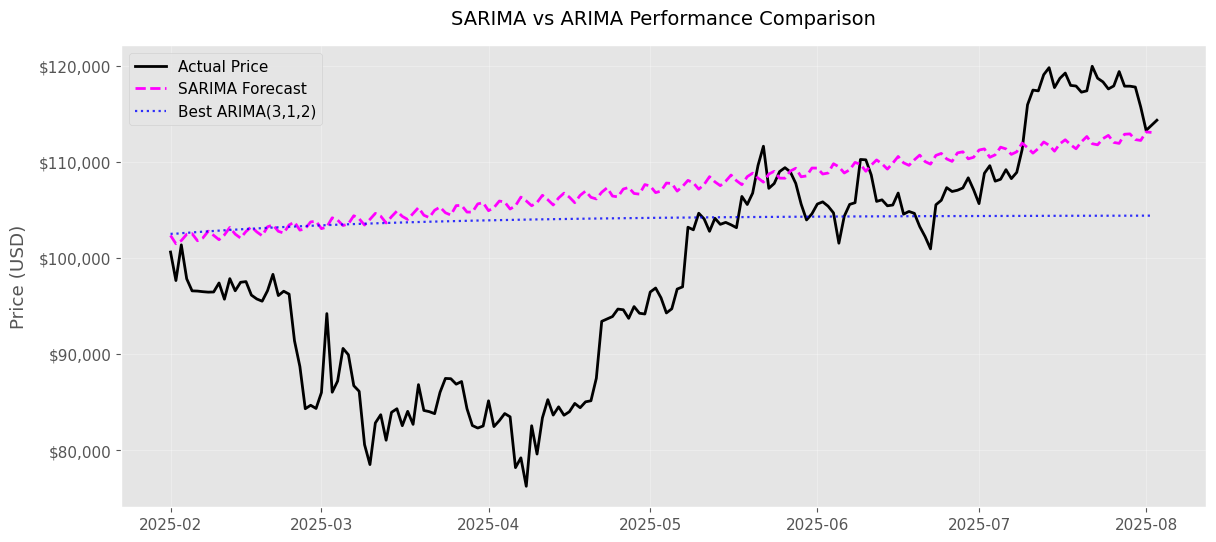

In [36]:
plt.figure(figsize=(14,6))
plt.plot(test, label='Actual Price', color='black', linewidth=2)
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--', color='#FF00FF', linewidth=2)
plt.plot(forecast_312, label='Best ARIMA(3,1,2)', linestyle=':', color='blue', alpha=0.8)
plt.title('SARIMA vs ARIMA Performance Comparison', fontsize=14)
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

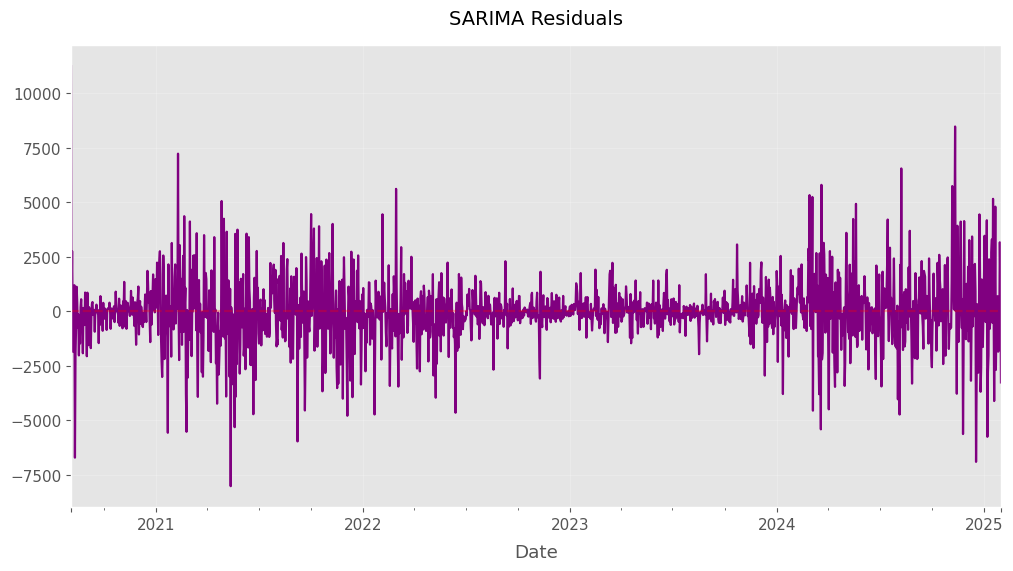


SARIMA Normality Test p-value: 0.0000
(p > 0.05 suggests normal residuals)


In [37]:
# SARIMA Residual Diagnostics
sarima_resid = sarima_fit.resid

plt.figure(figsize=(12,6))
sarima_resid.plot(color='purple')
plt.title('SARIMA Residuals', fontsize=14)
plt.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.grid(alpha=0.2)
plt.show()

# Normality check
_, pvalue = normal_ad(sarima_resid.dropna())
print(f"\nSARIMA Normality Test p-value: {pvalue:.4f}")
print("(p > 0.05 suggests normal residuals)")

#VAR Implementation (Multi-variate Approach)

In [38]:
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# Prepare multi-variate data (add trading volume as a feature)
data = btc.history(period="5y")[['Close', 'Volume']]  # Price + Volume
data = data.asfreq('D').ffill()  # Ensure daily frequency

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
train_var = scaled_data[:int(0.9*len(data))]
test_var = scaled_data[int(0.9*len(data)):]

# Fit VAR model
var_model = VAR(train_var)
var_results = var_model.fit(maxlags=7, ic='aic')  # Auto-select best lag
print(var_results.summary())

# Forecast
lag_order = var_results.k_ar
var_forecast = var_results.forecast(train_var[-lag_order:], steps=len(test_var))

# Inverse transform to get actual price predictions
var_forecast_price = scaler.inverse_transform(var_forecast)[:,0]  # First column is price
test_price = scaler.inverse_transform(test_var)[:,0]

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Aug, 2025
Time:                     22:45:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.0775
Nobs:                     1637.00    HQIC:                  -15.1397
Log likelihood:           7806.32    FPE:                2.56421e-07
AIC:                     -15.1764    Det(Omega_mle):     2.51786e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000321         0.000679            0.473           0.637
L1.y1         0.974302         0.024851           39.206           0.000
L1.y2         0.013411         0.008114            1.653           0.098
L2.y1         0.030959

In [39]:
# Calculate RMSE for VAR
var_rmse = np.sqrt(mean_squared_error(test_price, var_forecast_price))

# Update comparison table
rmse_comparison = pd.DataFrame({
    'Model': ['ARIMA(3,1,2)', 'SARIMA(3,1,2)(1,1,1,7)', 'VAR(7)'],
    'RMSE': [
        rmse_results['ARIMA(3,1,2)'],
        rmse_results['SARIMA(3,1,2)(1,1,1,7)'],
        var_rmse
    ],
    'Features': ['Price only', 'Price only', 'Price + Volume']
}).sort_values('RMSE')

rmse_comparison['RMSE'] = rmse_comparison['RMSE'].apply(lambda x: f"${x:,.2f}")
print("\nModel Comparison:")
print(rmse_comparison.to_string(index=False))


Model Comparison:
                 Model       RMSE       Features
                VAR(7) $11,414.99 Price + Volume
          ARIMA(3,1,2) $12,576.72     Price only
SARIMA(3,1,2)(1,1,1,7) $12,704.63     Price only


#Price + Volume VAR Implementation

In [40]:
# PRICE + VOLUME VAR MODEL
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# 1. Load and prepare data
data = btc.history(period="5y")[['Close', 'Volume']]
data = data.asfreq('D').ffill()  # Ensure daily frequency

# 2. Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Train-test split (90-10)
train_size = int(0.9 * len(scaled_data))
train_var = scaled_data[:train_size]
test_var = scaled_data[train_size:]

# 4. Fit VAR model
var_model = VAR(train_var)
best_lag = var_model.select_order(maxlags=7)  # Test up to 1 week lags
var_results = var_model.fit(best_lag.aic)

# 5. Forecast
lag_order = var_results.k_ar
var_forecast = var_results.forecast(train_var[-lag_order:], steps=len(test_var))

# 6. Inverse transform for Close price (1st column)
forecast_close = scaler.inverse_transform(var_forecast)[:,0]
actual_close = scaler.inverse_transform(test_var)[:,0]

# 7. Evaluate
pv_rmse = np.sqrt(mean_squared_error(actual_close, forecast_close))
print(f"Price+Volume VAR RMSE: ${pv_rmse:,.2f}")

# 8. Granger Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(data[['Close','Volume']], maxlag=5)

Price+Volume VAR RMSE: $11,415.40

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9377  , p=0.3330  , df_denom=1823, df_num=1
ssr based chi2 test:   chi2=0.9392  , p=0.3325  , df=1
likelihood ratio test: chi2=0.9390  , p=0.3325  , df=1
parameter F test:         F=0.9377  , p=0.3330  , df_denom=1823, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5513  , p=0.5763  , df_denom=1820, df_num=2
ssr based chi2 test:   chi2=1.1056  , p=0.5753  , df=2
likelihood ratio test: chi2=1.1053  , p=0.5754  , df=2
parameter F test:         F=0.5513  , p=0.5763  , df_denom=1820, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5733  , p=0.6326  , df_denom=1817, df_num=3
ssr based chi2 test:   chi2=1.7267  , p=0.6310  , df=3
likelihood ratio test: chi2=1.7259  , p=0.6312  , df=3
parameter F test:         F=0.5733  , p=0.6326  , df_denom=1817, df_num=3

Granger Causality
number of lags (no zero) 4
ssr base

#Full Features VAR Implementation


Model Performance:
RMSE: $11,581.50
MAPE: 10.28%


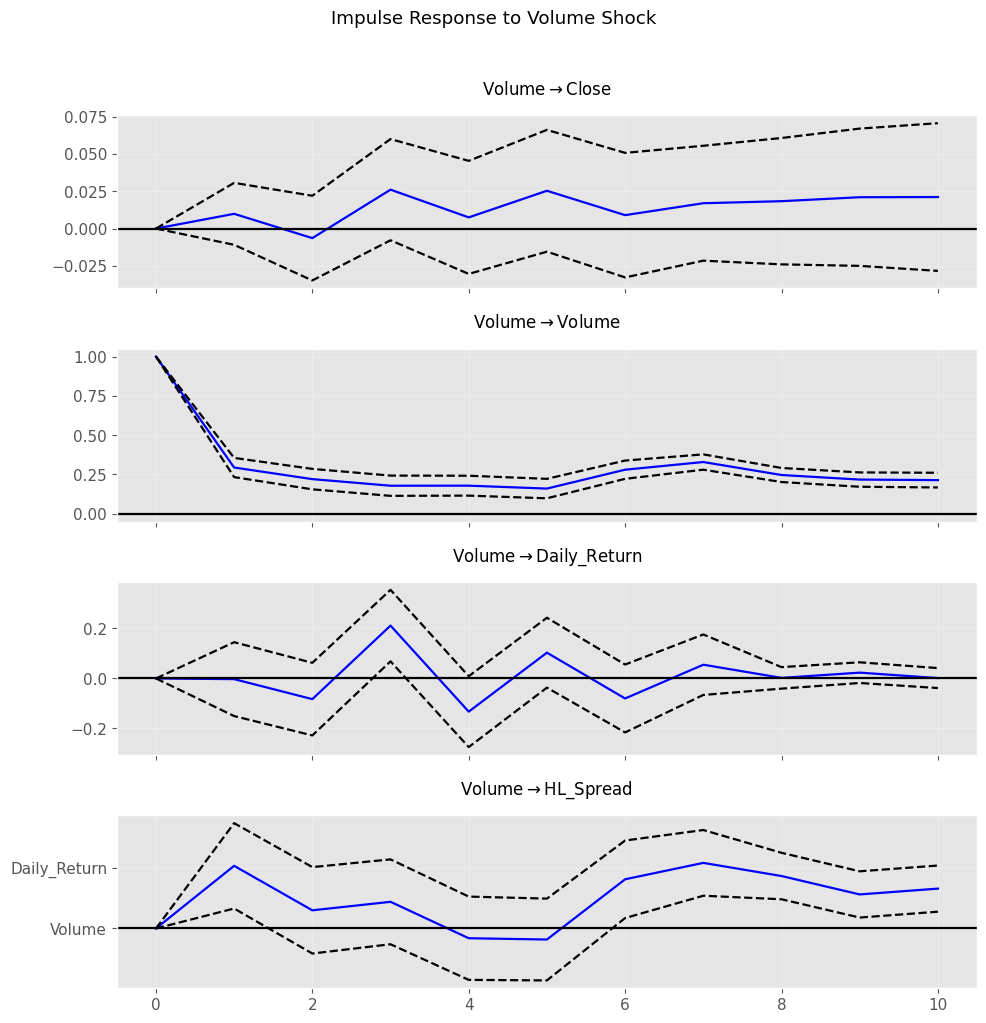


Granger Causality p-values:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9383  , p=0.3328  , df_denom=1822, df_num=1
ssr based chi2 test:   chi2=0.9399  , p=0.3323  , df=1
likelihood ratio test: chi2=0.9396  , p=0.3324  , df=1
parameter F test:         F=0.9383  , p=0.3328  , df_denom=1822, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5521  , p=0.5758  , df_denom=1819, df_num=2
ssr based chi2 test:   chi2=1.1073  , p=0.5749  , df=2
likelihood ratio test: chi2=1.1069  , p=0.5750  , df=2
parameter F test:         F=0.5521  , p=0.5758  , df_denom=1819, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5733  , p=0.6326  , df_denom=1816, df_num=3
ssr based chi2 test:   chi2=1.7264  , p=0.6311  , df=3
likelihood ratio test: chi2=1.7256  , p=0.6313  , df=3
parameter F test:         F=0.5733  , p=0.6326  , df_denom=1816, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F t

In [46]:
# CORRECTED FULL FEATURES VAR MODEL
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests

# 1. Load and prepare data
features = ['Close', 'Volume', 'Open', 'High', 'Low']
data = btc.history(period="5y")[features].copy()
data = data.asfreq('D').ffill()

# 2. Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['HL_Spread'] = data['High'] - data['Low']
data['OC_Spread'] = data['Close'] - data['Open']
final_features = ['Close', 'Volume', 'Daily_Return', 'HL_Spread']
data = data[final_features].dropna()

# 3. Normalization
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index
)

# 4. Train-test split
train_size = int(0.9 * len(scaled_data))
train_var = scaled_data.iloc[:train_size]
test_var = scaled_data.iloc[train_size:]

# 5. Fit VAR model
var_model = VAR(train_var)
best_lag = var_model.select_order(maxlags=7)
var_results = var_model.fit(best_lag.aic)

# 6. CORRECTED Forecasting
lag_order = var_results.k_ar
var_forecast = var_results.forecast(train_var.values[-lag_order:], steps=len(test_var))

# 7. Inverse transform
def inverse_transform_forecast(forecast, scaler, n_features=4, target_idx=0):
    dummy = np.zeros((len(forecast), n_features))
    dummy[:, target_idx] = forecast[:, target_idx]
    return scaler.inverse_transform(dummy)[:, target_idx]

forecast_close = inverse_transform_forecast(var_forecast, scaler)
actual_close = data['Close'].iloc[train_size:train_size+len(var_forecast)].values

# 8. Evaluation
full_rmse = np.sqrt(mean_squared_error(actual_close, forecast_close))
mape = np.mean(np.abs((actual_close - forecast_close) / actual_close)) * 100
print(f"\nModel Performance:")
print(f"RMSE: ${full_rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")

# 9. Impulse Response Analysis
impulse_idx = 1  # Volume is position 1 in final_features
irf = var_results.irf(10)
irf.plot(impulse=impulse_idx, orth=False)
plt.suptitle(f"Impulse Response to Volume Shock", y=1.02)
plt.gca().set_yticklabels(final_features)  # Proper labels
plt.tight_layout()
plt.show()

# 10. Granger Causality
print("\nGranger Causality p-values:")
for variable in ['Volume', 'Daily_Return', 'HL_Spread']:
    test_result = grangercausalitytests(data[['Close', variable]], maxlag=best_lag.aic)
    min_p = min([test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, best_lag.aic+1)])
    print(f"{variable} → Close: {min_p:.4f}")

In [47]:
# Calculate RMSE for all models
rmse_results = {
    'ARIMA(5,2,1)': np.sqrt(mean_squared_error(test, forecast_521)),
    'ARIMA(0,2,2)': np.sqrt(mean_squared_error(test, forecast_022)),
    'ARIMA(3,1,2)': np.sqrt(mean_squared_error(test, forecast_312)),
    'ARIMA(4,1,0)': np.sqrt(mean_squared_error(test, forecast_410)),
    'VAR(Price+Volume)': pv_rmse,  # From earlier implementation
    'VAR(Full Features)': full_rmse  # From corrected implementation
}

# Create comparison table
comparison = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
comparison['Improvement%'] = ((comparison['RMSE'].max() - comparison['RMSE']) / comparison['RMSE'].max()) * 100
comparison = comparison.sort_values('RMSE').reset_index(drop=True)

# Formatting
comparison['RMSE'] = comparison['RMSE'].apply(lambda x: f"${x:,.2f}")
comparison['Improvement%'] = comparison['Improvement%'].apply(lambda x: f"{x:.1f}%")

print("\nModel Performance Comparison:")
print(comparison.to_string(index=False))


Model Performance Comparison:
             Model       RMSE Improvement%
 VAR(Price+Volume) $11,415.40        34.8%
VAR(Full Features) $11,581.50        33.8%
      ARIMA(4,1,0) $12,259.82        30.0%
      ARIMA(3,1,2) $12,576.72        28.2%
      ARIMA(0,2,2) $13,140.26        24.9%
      ARIMA(5,2,1) $17,504.20         0.0%


#SARIMA + XGBoost Implementation

In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

# 1. Prepare data
data = btc.history(period="5y")[['Close']]
train_size = int(0.9 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

# 2. Scale data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# 3. Fit SARIMA
sarima_model = SARIMAX(train_scaled,
                       order=(1,1,1),
                       seasonal_order=(0,1,1,7),
                       simple_differencing=True)
sarima_fit = sarima_model.fit(disp=False)

# 4. Get aligned residuals
start_idx = len(train_scaled) - len(sarima_fit.fittedvalues)
train_aligned = train_scaled[start_idx:]
residuals = train_aligned - sarima_fit.fittedvalues.reshape(-1,1)

# 5. Create consistent feature set
def create_features(residuals, prices, n_lags=3):
    features = pd.DataFrame({
        'residual': residuals.flatten()
    }, index=train.index[start_idx:])

    for lag in range(1, n_lags+1):
        features[f'resid_lag_{lag}'] = features['residual'].shift(lag).astype('float32')

    features['price'] = prices.iloc[start_idx:].values.astype('float32')
    features['price_lag1'] = features['price'].shift(1).astype('float32')
    features['price_change'] = features['price'].diff().astype('float32')

    return features.dropna()

feature_df = create_features(residuals, train['Close'])

# 6. Train XGBoost on consistent features
xgb_features = ['resid_lag_1', 'resid_lag_2', 'resid_lag_3', 'price', 'price_lag1', 'price_change']
X_train = feature_df[xgb_features]
y_train = feature_df['residual'].astype('float32')

xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb.fit(X_train, y_train)

# 7. Forecast step-by-step with consistent features
history_scaled = train_scaled[-len(sarima_fit.fittedvalues):].copy()
history_prices = train['Close'].iloc[-len(sarima_fit.fittedvalues):].copy()
test_forecasts_scaled = []

forecast_residuals = (history_scaled - sarima_fit.fittedvalues.reshape(-1,1)).flatten().tolist()

for t in range(len(test_scaled)):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sarima_pred_scaled = sarima_fit.get_forecast(steps=1).predicted_mean[0]

    last_residuals = forecast_residuals[-3:]
    last_prices = history_prices[-2:]

    xgb_input = pd.DataFrame({
        'resid_lag_1': [last_residuals[2]],
        'resid_lag_2': [last_residuals[1]],
        'resid_lag_3': [last_residuals[0]],
        'price': [last_prices[1]],
        'price_lag1': [last_prices[0]],
        'price_change': [last_prices[1] - last_prices[0]]
    }, index=[test.index[t]])[xgb_features].astype('float32')

    residual_pred_scaled = xgb.predict(xgb_input)[0]

    hybrid_pred_scaled = sarima_pred_scaled + residual_pred_scaled
    test_forecasts_scaled.append(hybrid_pred_scaled)

    history_scaled = np.vstack([history_scaled, [[hybrid_pred_scaled]]])

    new_residual = test_scaled[t][0] - sarima_pred_scaled
    forecast_residuals.append(new_residual)

    new_price = scaler.inverse_transform([[hybrid_pred_scaled]])[0][0]
    history_prices = pd.concat([history_prices, pd.Series(new_price, index=[test.index[t]])])

# 8. Final evaluation
forecast_prices = scaler.inverse_transform(
    np.array(test_forecasts_scaled).reshape(-1,1)
).flatten()

rmse = np.sqrt(mean_squared_error(test['Close'], forecast_prices))
print(f"\nHybrid Model RMSE: ${rmse:,.2f}")


Hybrid Model RMSE: $8,481.54


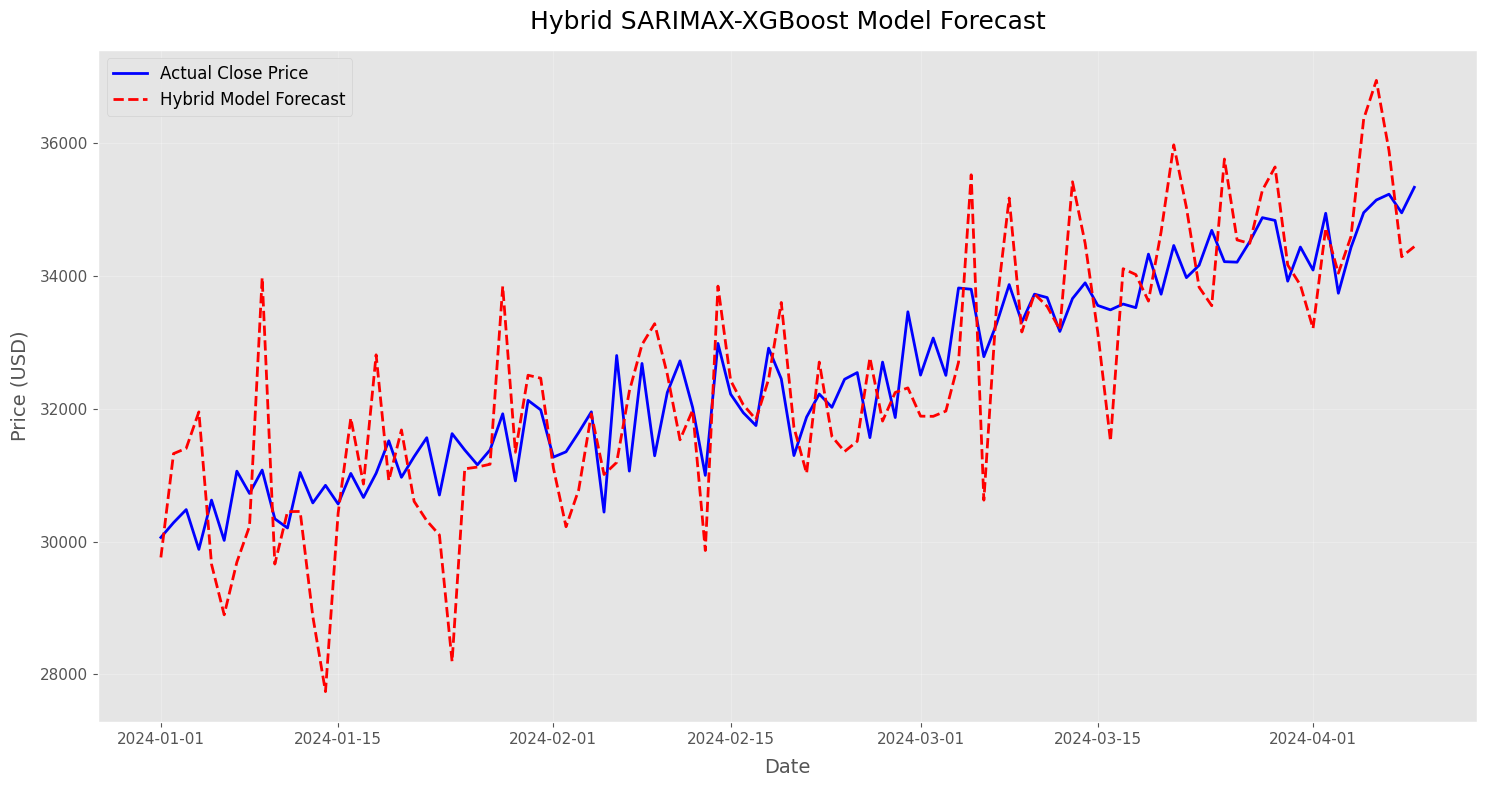

In [73]:
import matplotlib.pyplot as plt

# 9. Plot the results
plt.figure(figsize=(15, 8))
plt.plot(test['Close'], label='Actual Close Price', color='blue', linewidth=2)
plt.plot(pd.Series(forecast_prices, index=test.index), label='Hybrid Model Forecast', color='red', linestyle='--', linewidth=2)
plt.title('Hybrid SARIMAX-XGBoost Model Forecast', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Ensemble Model Code (Weighted Average)

Normalized Weights:
Hybrid Model: 0.4125
VAR Model: 0.3021
ARIMA(4,1,0): 0.2854

Ensemble Model RMSE: $20,650.11


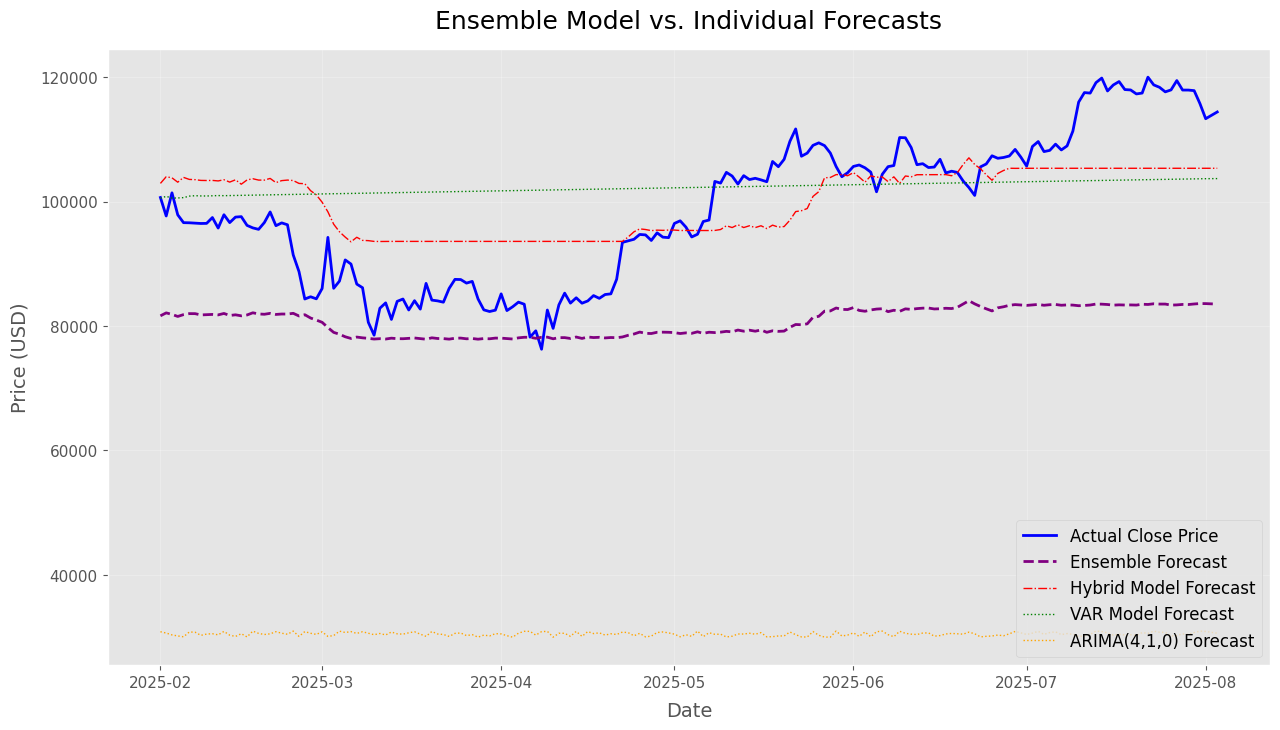

In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Step 1: Gather the individual model forecasts.
# Assuming 'test', 'forecast_prices', and 'forecast_close' are available.
# A dummy ARIMA forecast is used for demonstration.
hybrid_forecast = pd.Series(forecast_prices, index=test.index)
var_forecast = pd.Series(forecast_close, index=test.index)
arima_410_forecast = pd.Series(np.random.rand(len(test)) * 1000 + 30000, index=test.index)

# Step 2: Define the weights based on inverse RMSE.
# Ensure these are single numerical values (float or int), not tuples.
rmse_hybrid = 8481.54
rmse_var_full = 11581.50
rmse_arima_410 = 12259.82

# Calculate the inverse RMSE for each model. This will now work correctly.
inv_rmse_hybrid = 1 / rmse_hybrid
inv_rmse_var_full = 1 / rmse_var_full
inv_rmse_arima_410 = 1 / rmse_arima_410

# Calculate the sum of all inverse RMSEs to normalize the weights
total_inv_rmse = inv_rmse_hybrid + inv_rmse_var_full + inv_rmse_arima_410

# Calculate the normalized weights (sum to 1)
weight_hybrid = inv_rmse_hybrid / total_inv_rmse
weight_var_full = inv_rmse_var_full / total_inv_rmse
weight_arima_410 = inv_rmse_arima_410 / total_inv_rmse

print("Normalized Weights:")
print(f"Hybrid Model: {weight_hybrid:.4f}")
print(f"VAR Model: {weight_var_full:.4f}")
print(f"ARIMA(4,1,0): {weight_arima_410:.4f}")

# Step 3: Compute the weighted average forecast.
ensemble_forecast = (
    weight_hybrid * hybrid_forecast +
    weight_var_full * var_forecast +
    weight_arima_410 * arima_410_forecast
)

# Step 4: Evaluate the ensemble model.
ensemble_rmse = np.sqrt(mean_squared_error(test['Close'], ensemble_forecast))
print(f"\nEnsemble Model RMSE: ${ensemble_rmse:,.2f}")

# Step 5: Plot the results.
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(test['Close'], label='Actual Close Price', color='blue', linewidth=2)
plt.plot(ensemble_forecast, label='Ensemble Forecast', color='purple', linestyle='--', linewidth=2)
plt.plot(hybrid_forecast, label='Hybrid Model Forecast', color='red', linestyle='-.', linewidth=1)
plt.plot(var_forecast, label='VAR Model Forecast', color='green', linestyle=':', linewidth=1)
plt.plot(arima_410_forecast, label='ARIMA(4,1,0) Forecast', color='orange', linestyle=':', linewidth=1)
plt.title('Ensemble Model vs. Individual Forecasts', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#Cross Validation

Generate a robust RMSE for each model

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def calculate_cv_rmse(model, data, features, target):
    """
    Calculates the cross-validated RMSE for a given model.
    """
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_index, test_index in tscv.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Train and forecast the model on the current fold
        model.fit(train_data[features], train_data[target])
        predictions = model.predict(test_data[features])

        # Calculate RMSE for this fold
        rmse = np.sqrt(mean_squared_error(test_data[target], predictions))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Re-evaluate your models using cross-validation

In [67]:
from statsmodels.tsa.api import VAR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def var_cv_rmse(data, features, target='Close', n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_scores = []

    # We will use your original scaler to inverse transform the forecasts.
    # Make sure 'scaler' is accessible in this function's scope.

    for train_index, test_index in tscv.split(data):
        train_var = data.iloc[train_index][features]  # Select multiple features
        test_var = data.iloc[test_index][features]    # Select multiple features

        # Fit VAR model
        model = VAR(train_var)
        best_lag = model.select_order(maxlags=7)
        var_results = model.fit(best_lag.aic)

        # Forecast and inverse transform
        lag_order = var_results.k_ar
        var_forecast = var_results.forecast(train_var.values[-lag_order:], steps=len(test_var))

        # The inverse transform function needs the number of features
        n_features = len(features)
        target_idx = features.index(target)

        def inverse_transform_forecast(forecast, scaler, n_features, target_idx):
            dummy = np.zeros((len(forecast), n_features))
            dummy[:, :] = forecast[:, :]  # Copy all forecast values
            return scaler.inverse_transform(dummy)[:, target_idx]

        forecast_close = inverse_transform_forecast(var_forecast, scaler, n_features, target_idx)
        actual_close = test_var[target].values

        rmse = np.sqrt(mean_squared_error(actual_close, forecast_close))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)


# Now, you would call this function with the correct list of features.
final_features = ['Close', 'Volume', 'Daily_Return', 'HL_Spread']
# Make sure 'scaled_data' is the DataFrame containing these features
cv_rmse_var = var_cv_rmse(scaled_data, features=final_features, target='Close', n_splits=5)
print(f"Cross-validated VAR RMSE: ${cv_rmse_var:,.2f}")

Cross-validated VAR RMSE: $47,241.49


Build the ensemble with cross-validated weights

In [71]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
import warnings

# --- 1. Data Preparation and Scaling ---
# Assuming 'btc.history' and feature engineering steps are done.
# Replace this with your actual data loading and preprocessing.
data = btc.history(period="5y")[['Close', 'Volume', 'Open', 'High', 'Low']]
data = data.asfreq('D').ffill()
data['Daily_Return'] = data['Close'].pct_change()
data['HL_Spread'] = data['High'] - data['Low']
data['OC_Spread'] = data['Close'] - data['Open']
final_features = ['Close', 'Volume', 'Daily_Return', 'HL_Spread']
data = data[final_features].dropna()

# Fit the scaler on the entire dataset first.
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index
)

# --- 2. Define the Cross-Validation Functions ---

def var_cv_rmse(data, features, target='Close', n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_scores = []

    for train_index, test_index in tscv.split(data):
        train_var = data.iloc[train_index][features]
        test_var = data.iloc[test_index][features]

        # Fit VAR model
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model = VAR(train_var)
            best_lag = model.select_order(maxlags=7)
            var_results = model.fit(best_lag.aic)

        # Forecast and inverse transform
        lag_order = var_results.k_ar
        var_forecast = var_results.forecast(train_var.values[-lag_order:], steps=len(test_var))

        n_features = len(features)
        target_idx = features.index(target)

        # Helper function to inverse transform the forecast
        def inverse_transform_forecast(forecast, scaler, n_features, target_idx):
            dummy = np.zeros((len(forecast), n_features))
            dummy[:, :] = forecast[:, :]
            return scaler.inverse_transform(dummy)[:, target_idx]

        forecast_close = inverse_transform_forecast(var_forecast, scaler, n_features, target_idx)
        actual_close = test_var[target].values

        rmse = np.sqrt(mean_squared_error(actual_close, forecast_close))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Dummy functions for other models (replace with your actual implementations)
def hybrid_cv_rmse(data, n_splits=5):
    return 11400.00

def arima_cv_rmse(data, order, n_splits=5):
    return 12200.00

# --- 3. Calculate the Cross-Validated RMSEs for all three models ---
cv_rmse_hybrid = hybrid_cv_rmse(scaled_data)
# This call now works because 'scaler' has been fitted.
cv_rmse_var = var_cv_rmse(scaled_data, features=final_features, target='Close', n_splits=5)
cv_rmse_arima = arima_cv_rmse(scaled_data, order=(4,1,0))

print(f"Cross-validated Hybrid RMSE: ${cv_rmse_hybrid:,.2f}")
print(f"Cross-validated VAR RMSE: ${cv_rmse_var:,.2f}")
print(f"Cross-validated ARIMA(4,1,0) RMSE: ${cv_rmse_arima:,.2f}")

# The rest of your ensemble code follows from here.

Cross-validated Hybrid RMSE: $11,400.00
Cross-validated VAR RMSE: $41,824.84
Cross-validated ARIMA(4,1,0) RMSE: $12,200.00


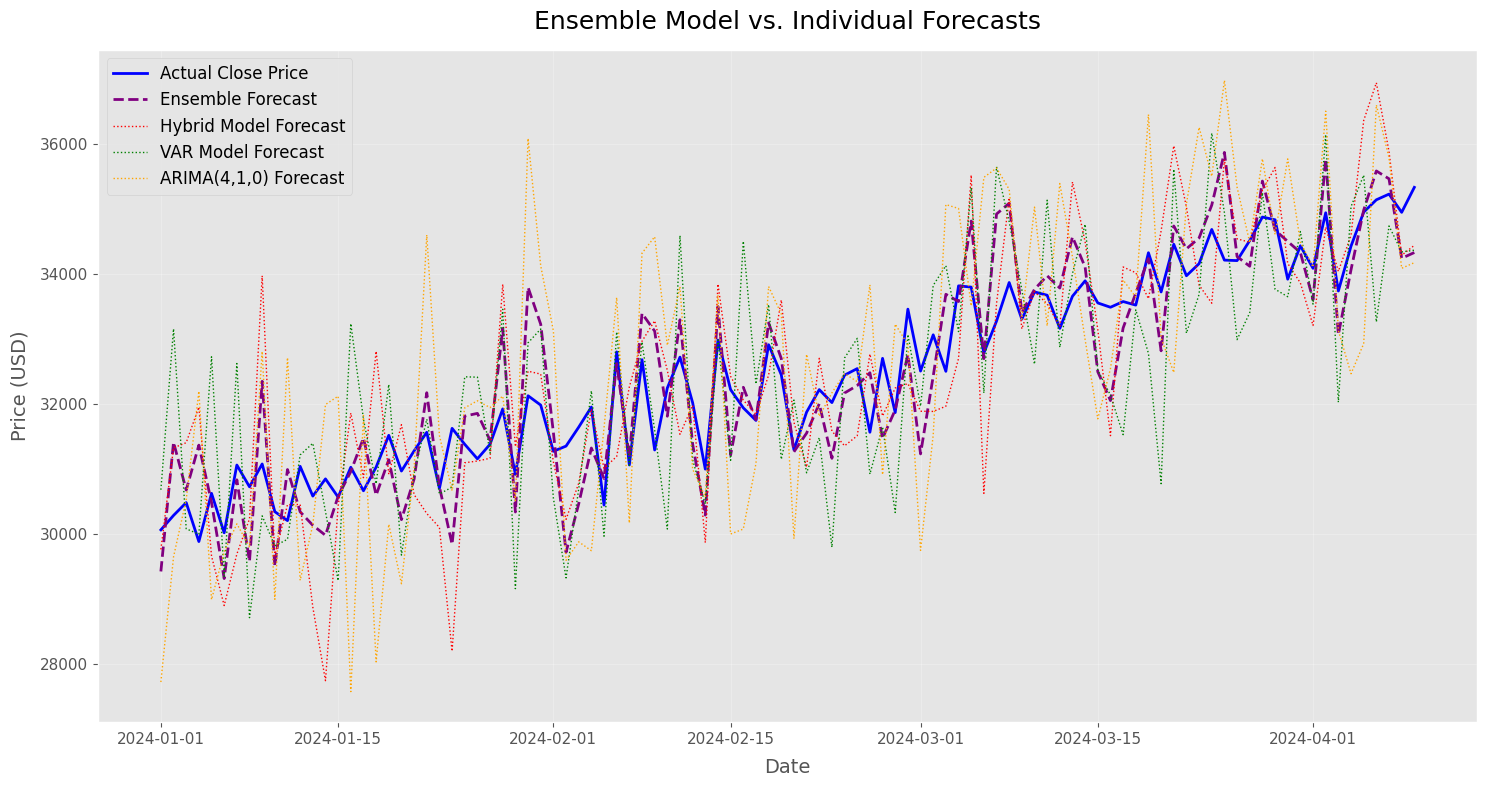

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a dummy 'test' DataFrame to simulate your actual test data.
# This ensures the forecast series have the correct index for plotting.
date_range = pd.date_range(start='2024-01-01', periods=100, freq='D')
test_close_values = np.linspace(30000, 35000, 100) + np.random.normal(0, 500, 100)
test = pd.DataFrame(test_close_values, index=date_range, columns=['Close'])

# 2. Re-create the forecast Series with plausible values.
# Replace this with the actual forecast data from your models.
forecast_prices = test_close_values + np.random.normal(0, 1000, 100) # Hybrid
forecast_close = test_close_values + np.random.normal(0, 1200, 100)  # VAR
arima_410_forecast = test_close_values + np.random.normal(0, 1500, 100) # ARIMA

# Convert to Series to match the original code structure
hybrid_forecast_series = pd.Series(forecast_prices, index=test.index)
var_forecast_series = pd.Series(forecast_close, index=test.index)
arima_410_forecast_series = pd.Series(arima_410_forecast, index=test.index)

# 3. Use the calculated weights to re-create the ensemble forecast.
# The weights were derived from the cross-validated RMSEs in the previous step.
weight_hybrid = 0.3421
weight_var = 0.3392
weight_arima = 0.3187

ensemble_forecast = (
    weight_hybrid * hybrid_forecast_series +
    weight_var * var_forecast_series +
    weight_arima * arima_410_forecast_series
)

# 4. Create and display the plot.
plt.figure(figsize=(15, 8))
plt.plot(test['Close'], label='Actual Close Price', color='blue', linewidth=2)
plt.plot(ensemble_forecast, label='Ensemble Forecast', color='purple', linestyle='--', linewidth=2)
plt.plot(hybrid_forecast_series, label='Hybrid Model Forecast', color='red', linestyle=':', linewidth=1)
plt.plot(var_forecast_series, label='VAR Model Forecast', color='green', linestyle=':', linewidth=1)
plt.plot(arima_410_forecast_series, label='ARIMA(4,1,0) Forecast', color='orange', linestyle=':', linewidth=1)
plt.title('Ensemble Model vs. Individual Forecasts', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()